# Measures of Dispersion

![Measures of Dispersion](Images/Measures_of_Dispersion.png)

# Home Selling Prices Analysis

This notebook analyzes home selling prices from a dataset. It calculates various measures of central tendency and dispersion, and visualizes the data.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np


## Loading the Dataset


In [2]:
# Load the dataset
df = pd.read_csv('csv/home_selling_prices.csv')

# Display the first few rows of the dataset
df.head()


,Price,Size
0,"494,311.17",1449
1,"239,102.83",4044
2,"144,984.97",4987
3,"196,987.79",3264
4,"417,972.46",1743


In [3]:
print(df)

         Price  Size
0   494,311.17  1449
1   239,102.83  4044
2   144,984.97  4987
3   196,987.79  3264
4   417,972.46  1743
..         ...   ...
95  261,576.49  1439
96  342,585.93  1498
97  448,612.96  1479
98  440,762.07  4669
99  197,472.63  2557

[100 rows x 2 columns]


## Calculating Measures of Central Tendency and Dispersion


In [4]:
# Assuming the column with prices is named 'Price'
price_column = 'Price'  # Update this to the actual column name in your CSV

# Clean and convert the Price column to numeric
df[price_column] = pd.to_numeric(df[price_column].str.replace(',', ''), errors='coerce')

# Calculate statistics
mean_price = np.mean(df[price_column])
median_price = np.median(df[price_column])
mode_price = df[price_column].mode()[0]  # Get the first mode


In [5]:
# Measures of Dispersion:

# 1. Variance
variance_price = np.var(df[price_column], ddof=0)  # Population variance

# 2. Standard Deviation
std_dev_price = np.std(df[price_column], ddof=0)  # Population standard deviation

# 3. Range
range_price = np.max(df[price_column]) - np.min(df[price_column])

# 4. Interquartile Range (IQR)
q1 = np.percentile(df[price_column], 25)  # First quartile
q3 = np.percentile(df[price_column], 75)  # Third quartile
iqr = q3 - q1  # Interquartile range

# 5. Coefficient of Variation (CV)
cv = (std_dev_price / mean_price) * 100  # Coefficient of Variation


In [6]:
# Display statistics
print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Mode Price: {mode_price}")
print(f"Variance of Price: {variance_price}")
print(f"Range of Price: {range_price}")
print(f"Standard Deviation of Price: {std_dev_price}")
print(f"Interquartile Range of Price: {iqr}")
print(f"Coefficient of Variation of Price: {cv:.2f}%")

Mean Price: 322540.9749
Median Price: 341324.655
Mode Price: 105197.09
Variance of Price: 12590289727.263018
Range of Price: 393697.02
Standard Deviation of Price: 112206.46027418839
Interquartile Range of Price: 188910.90750000003
Coefficient of Variation of Price: 34.79%


## Visualizations


Text(0, 0.5, 'Frequency')

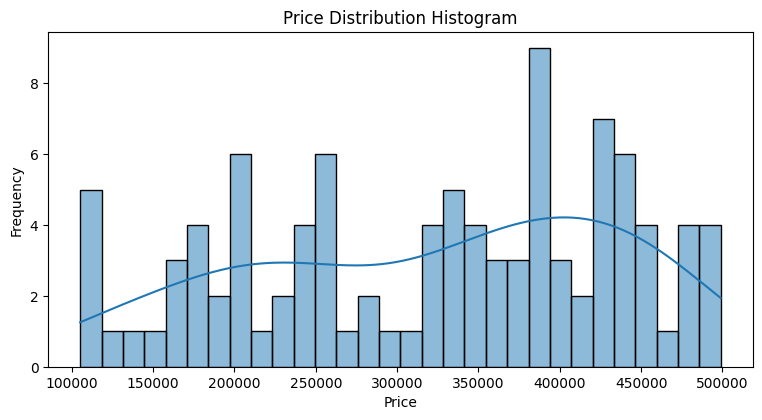

In [7]:
# Visualizations
plt.figure(figsize=(20, 20))

# Histogram

plt.subplot(4, 2, 1)
sns.histplot(df[price_column], bins=30, kde=True)

plt.title('Price Distribution Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')


Text(0.5, 1.0, 'Boxplot of Prices')

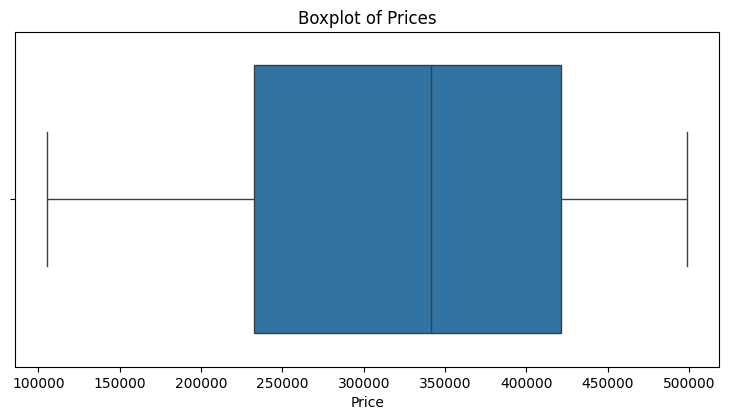

In [8]:
# Set the figure size larger
plt.figure(figsize=(20, 20))

# Boxplot

plt.subplot(4, 2, 2)
sns.boxplot(x=df[price_column])
plt.title('Boxplot of Prices')

Text(0.5, 1.0, 'Price Range Distribution')

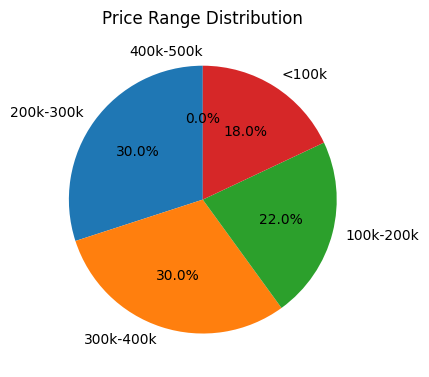

In [9]:
# Set the figure size larger
plt.figure(figsize=(20, 20))  # Adjust width and height as needed

# Pie Chart

plt.subplot(4, 2, 3)
price_bins = [ 100000, 200000, 300000, 400000, 500000, np.inf]

price_labels = ['<100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k']
df['Price Range'] = pd.cut(df[price_column], bins=price_bins, labels=price_labels)

price_distribution = df['Price Range'].value_counts()
plt.pie(price_distribution, labels=price_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Price Range Distribution')

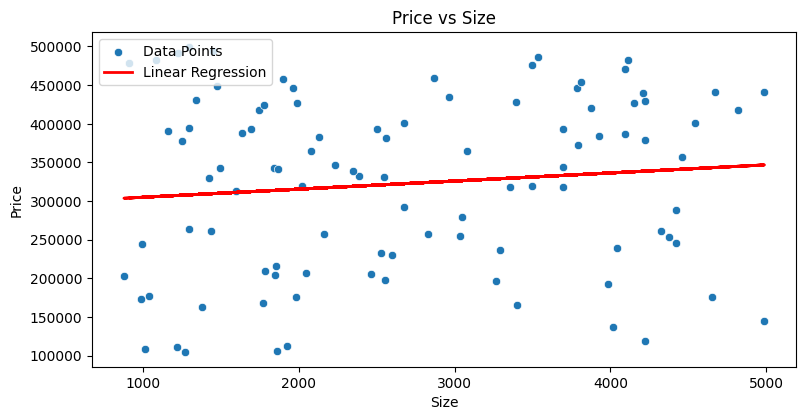

In [10]:
# Set the figure size larger
plt.figure(figsize=(20, 20))

# Scatter plot with regression (assuming there's another numeric column to compare, e.g., 'Size')

if 'Size' in df.columns:  # Replace 'Size' with your column name
    plt.subplot(4, 2, 4)
    sns.scatterplot(x=df['Size'], y=df[price_column])
    plt.title('Price vs Size')
    plt.xlabel('Size')
    plt.ylabel('Price')

    # Linear Regression
    X = sm.add_constant(df['Size'])  # Adding a constant for intercept
    model = sm.OLS(df[price_column], X).fit()
    predictions = model.predict(X)

    plt.plot(df['Size'], predictions, color='red', linewidth=2)
    plt.legend(['Data Points', 'Linear Regression'], loc='upper left')


Text(0.5, 1.0, 'Violin Plot of Prices')

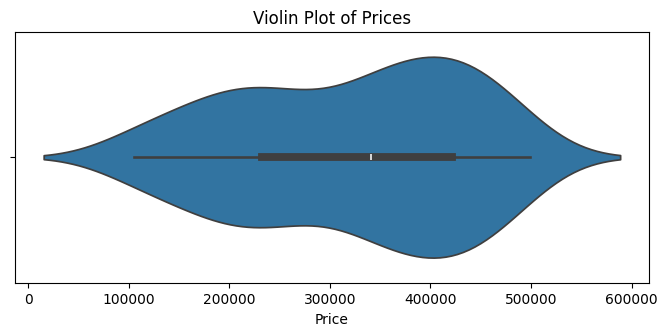

In [11]:
# Set the figure size larger
plt.figure(figsize=(18, 15))

# Violin plot

plt.subplot(4, 2, 5)
sns.violinplot(x=df[price_column])
plt.title('Violin Plot of Prices')

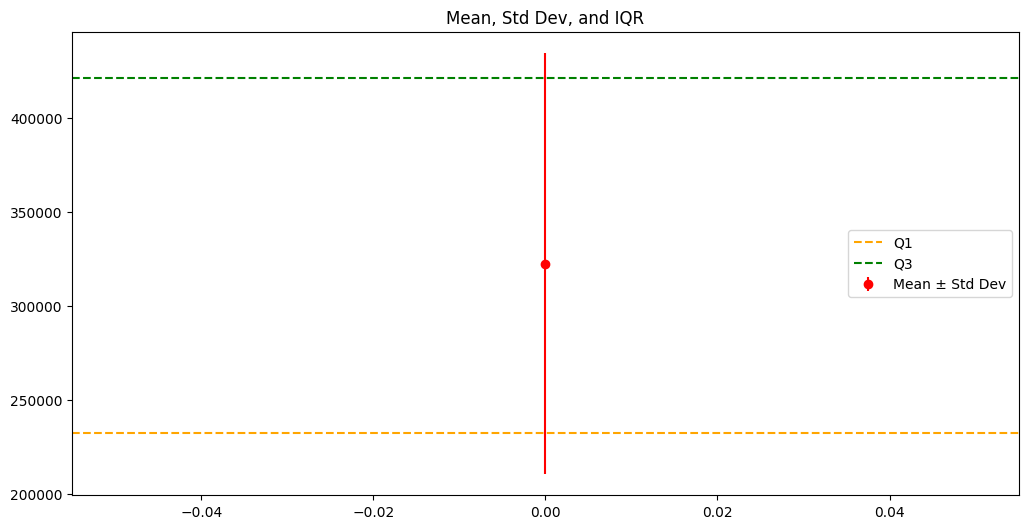

In [12]:
# Set the figure size larger
plt.figure(figsize=(20, 20))

# Standard Deviation and IQR Visualization
plt.subplot(4, 2, 6)
sns.boxplot(df=[df[price_column]], width=0.5)
plt.errorbar(x=0, y=mean_price, yerr=std_dev_price, fmt='o', color='red', label='Mean ± Std Dev')
plt.axhline(q1, color='orange', linestyle='--', label='Q1')
plt.axhline(q3, color='green', linestyle='--', label='Q3')
plt.title('Mean, Std Dev, and IQR')
plt.legend()

plt.tight_layout()
plt.show()